# ML 1. Two class classification problem

In [2]:
%pylab inline
import novainstrumentation as ni
import seaborn

Populating the interactive namespace from numpy and matplotlib


Consider a classification problem with two classes: 

C1 with $$\mu_1 = -1, \sigma_1 = 1$$   
C2 with $$\mu_2 = 1, \sigma_2 = 1$$ 

and assume the classes to be equiprobable: $$P(w_1) = p(w_2) = 0.5$$

Plot the pdf of each function.


$p(x|w) =\frac{1}{\sqrt{2\sigma^2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

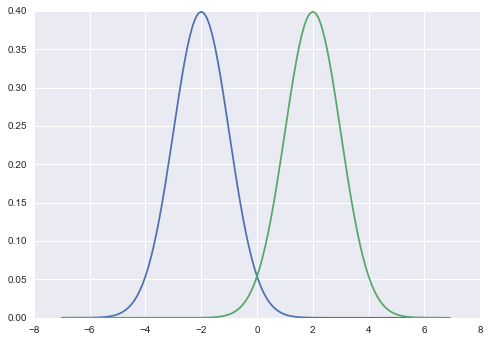

In [3]:
def npdf(x,u,s):
    return 1/(sqrt(2*pi)*s) * exp((-(x-u)**2)/(2*s*s))

dx = 0.1
x = arange(-7,7,dx)
u1 = -2; s1 = 1
u2 = 2; s2 = 1
p1 = npdf(x,u1,s1)
p2 = npdf(x,u2,s2)

plot(x,p1)
plot(x,p2)

Derive the error formula by integrating the discriminative function

$$g_i(x) = p(x|w_i)*p(w_i)  $$

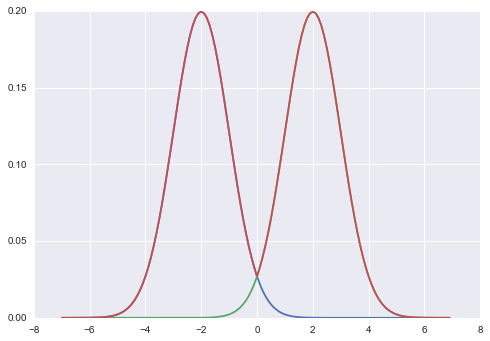

In [4]:

g1 = p1*0.5
g2 = p2*0.5


plot(x,g1)
plot(x,g2)

ac = array([max(a,b) for a,b in zip(g1,g2) ])
plot(x,ac)

Compute the error as $P_e = 1 - \int_{-\infty}^{\infty}\max_i(g_i)$

In [5]:
1-sum(ac)*dx

0.022840394686316046

Calculate the error analiticaly: $ e =  2 \int_{-\infty}^0 g_2$

$cdf = \int pdf, cdf = \frac12\left[1 + \operatorname{erf}\left( \frac{x-\mu} ){\sigma\sqrt{2}}\right)\right] p(w) $

In [13]:
from scipy.special import erf

e = 1/2.*(1+erf((0-2)/sqrt(2)))*2*0.5

e

0.022750131948179209

In [7]:
N=1e6
d=randn(int(N))+u2

sum(d<0.0)/float(N)

0.022978999999999999

Use sklearn to learn and test the classification
1. Generate de data

array([1, 0, 0, ..., 0, 0, 1])

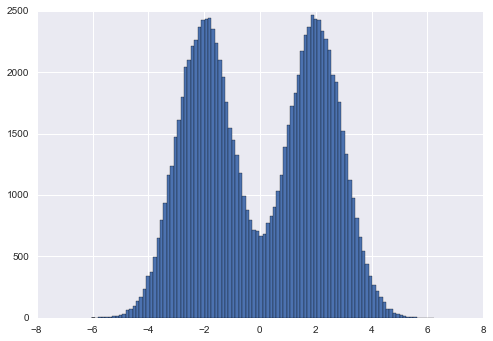

In [8]:
N=1e5
y=randint(2,size=int(N))
x=randn(int(N))+y.astype('float')*4.-2.
hist(x,100)
x=x.reshape(-1, 1)


2. Divide the data in test and train sets
3. Fit and classify
4. Measure the error

In [10]:
x_test = x[:int(N/2)]
y_test = y[:int(N/2)]
x_train = x[int(N/2):]
y_train = y[int(N/2):]

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print (y_test != y_pred).sum()/(N/2.)

0.02286


array([[-1.98832804],
       [ 1.99220991]])

Observe the trained parameters